#IMPORT LIBRARY YANG DIPAKAI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# PEMANGGILAN DATASET YANG DIPAKAI

In [2]:
df = pd.read_csv("avocado.csv")

#DESKRIPSI DATASET

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
column_to_drop = 'Unnamed: 0'
df = df.drop(columns=[column_to_drop])

In [5]:
column_to_drop = 'XLarge Bags'
df = df.drop(columns=[column_to_drop])

In [6]:
column_to_drop = '4046'
df = df.drop(columns=[column_to_drop])

In [7]:
column_to_drop = '4225'
df = df.drop(columns=[column_to_drop])

In [8]:
column_to_drop = 'Date'
df = df.drop(columns=[column_to_drop])

In [9]:
column_to_drop = 'type'
df = df.drop(columns=[column_to_drop])

In [10]:
column_to_drop = 'region'
df = df.drop(columns=[column_to_drop])

In [11]:
column_to_drop = '4770'
df = df.drop(columns=[column_to_drop])

In [12]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,year
0,1.33,64236.62,8696.87,8603.62,93.25,2015
1,1.35,54876.98,9505.56,9408.07,97.49,2015
2,0.93,118220.22,8145.35,8042.21,103.14,2015
3,1.08,78992.15,5811.16,5677.40,133.76,2015
4,1.28,51039.60,6183.95,5986.26,197.69,2015


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   year          18249 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 855.5 KB


<Axes: >

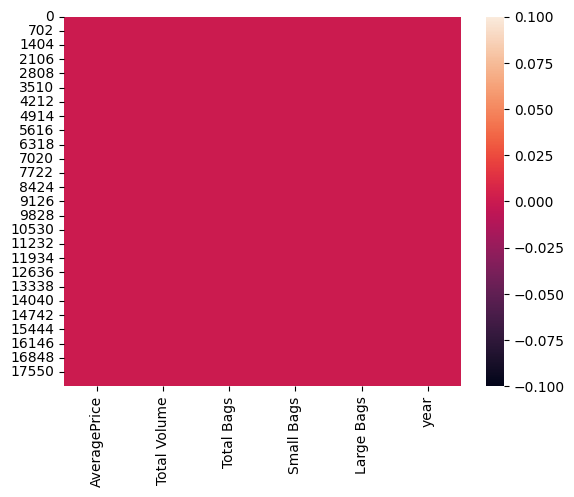

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.describe()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.396392e+05,1.821947e+05,5.433809e+04,2016.147899
std,0.402677,3.453545e+06,9.862424e+05,7.461785e+05,2.439660e+05,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.083858e+04,5.088640e+03,2.849420e+03,1.274700e+02,2015.000000
50%,1.370000,1.073768e+05,3.974383e+04,2.636282e+04,2.647710e+03,2016.000000
75%,1.660000,4.329623e+05,1.107834e+05,8.333767e+04,2.202925e+04,2017.000000
max,3.250000,6.250565e+07,1.937313e+07,1.338459e+07,5.719097e+06,2018.000000


<Axes: >

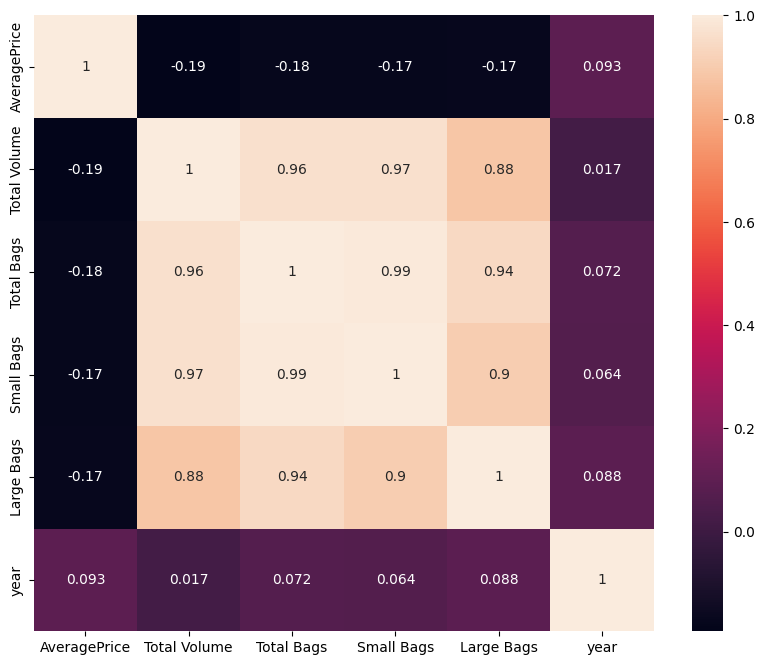

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [17]:
df[df.duplicated()]

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,year


In [18]:
df.drop_duplicates(inplace=True)

# RATA-RATA HARGA ALPUKAT PER TAHUN

In [19]:
rerata = df.groupby('year').count()[['AveragePrice']].sort_values(by='AveragePrice',ascending=True).reset_index()
rerata = rerata.rename(columns={'AveragePrice':'Rerata Harga'})

([0, 1, 2, 3],
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

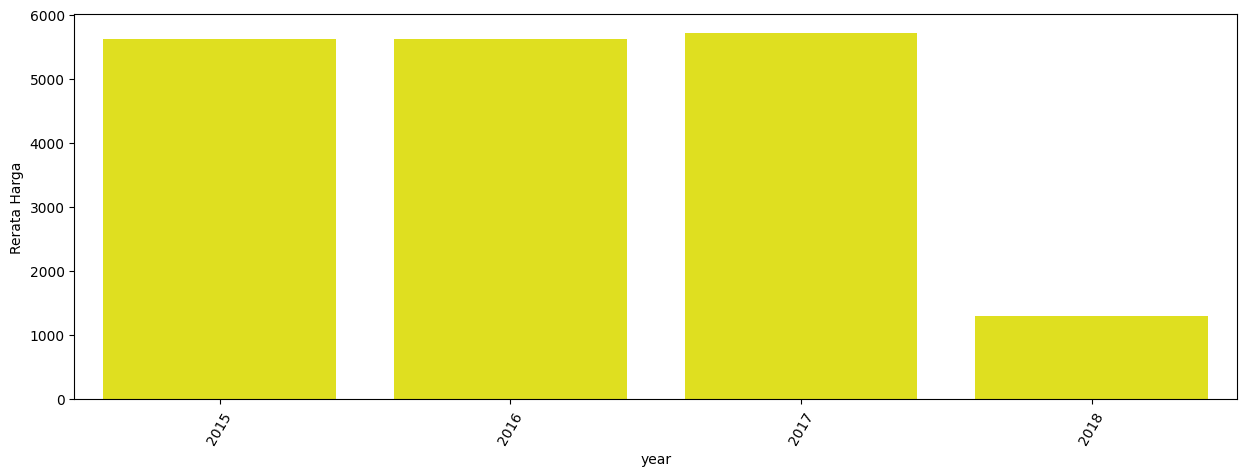

In [20]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=rerata['year'], y=rerata['Rerata Harga'], color='yellow')
plt.xticks(rotation=60)

# TOTAL VOLUME ALPUKAT PER TAHUN

In [21]:
volume = df.groupby('year').count()[['Total Volume']].sort_values(by='Total Volume',ascending=True).reset_index()
volume = volume.rename(columns={'Total Volume':'Total Volume'})

([0, 1, 2, 3],
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

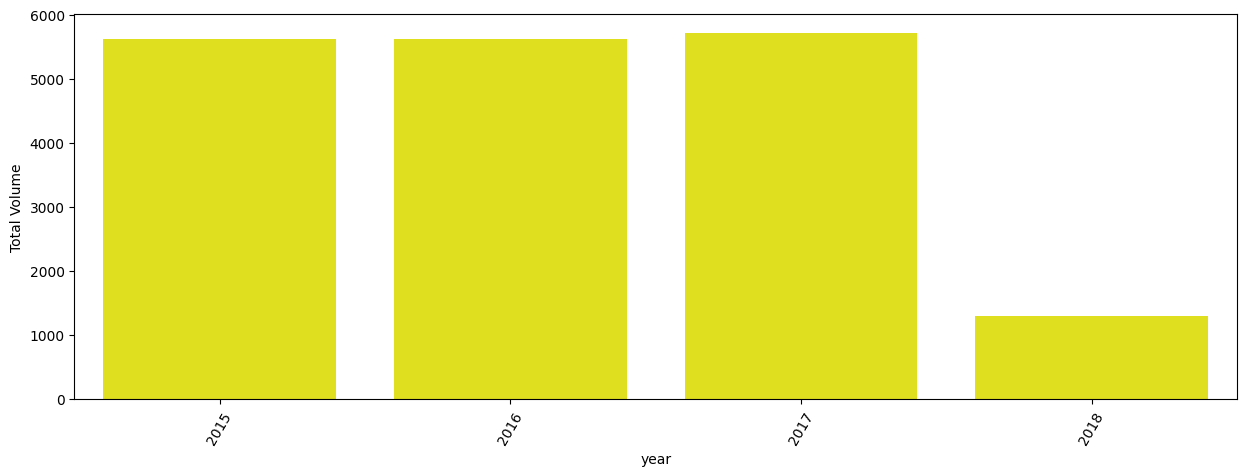

In [22]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=volume['year'], y=volume['Total Volume'], color='yellow')
plt.xticks(rotation=60)

# TOTAL BAGS PERTAHUN

In [23]:
bags = df.groupby('year').count()[['Total Bags']].sort_values(by='Total Bags',ascending=True).reset_index()
bags = bags.rename(columns={'Total Bags':'Total Bags'})

([0, 1, 2, 3],
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

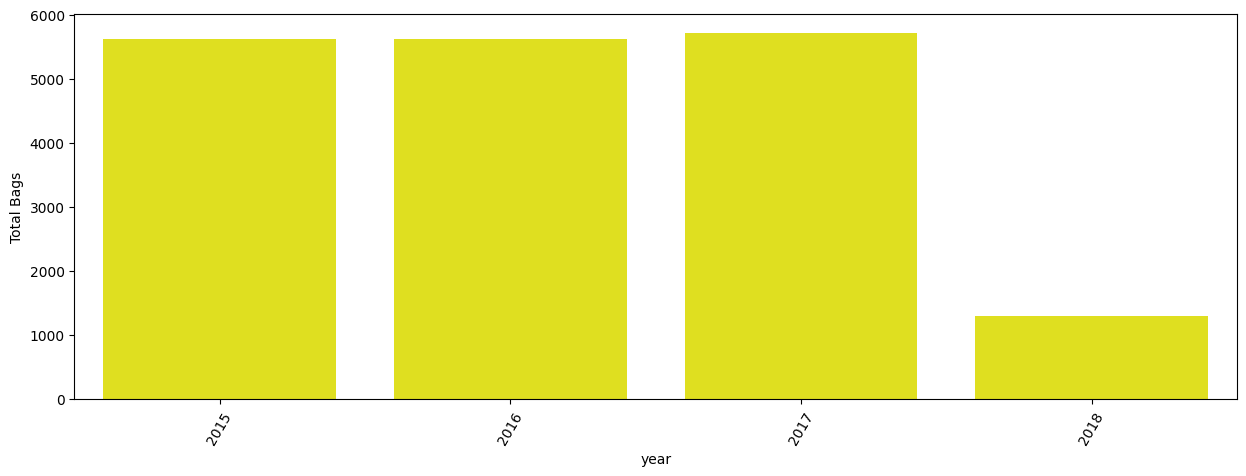

In [24]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=bags['year'], y=bags['Total Bags'], color='yellow')
plt.xticks(rotation=60)

# SELEKSI FITUR

In [25]:
features = ['Total Volume','Total Bags','Small Bags','Large Bags','year']
x = df[features]
y = df['AveragePrice']
x.shape, y.shape

((18249, 5), (18249,))

# SPLIT DATA TRAINING DAN DATA TESTING

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=56)
y_test.shape

(4563,)

# MEMBUAT MODEL RESGRESI LINEAR

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [33]:
score = lr.score(x_test, y_test)
print('akurasi nya adalah : ',score)

akurasi nya adalah :  0.04741104057818357


# INPUTAN LINEAR

INPUTAN MODEL :
Volume :
Berapa Kantong :
Kantong Kecil :
Kantong Besar :
Tahun :

In [29]:
input_data = np.array([[1,2,1,1,2015]])

prediction = lr.predict(input_data)
print('estimasi harga Alpukat sekitar : $', prediction,)

estimasi harga Alpukat sekitar : $ [1.38080758]


c:\Users\ANAK KONTOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# SAVE

In [30]:
import pickle

filename ='estimasi_harga_alpukat.sav'
pickle.dump(lr,open(filename,'wb'))